In [1]:
import requests
import bs4
import re
from bs4 import BeautifulSoup
import math
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import datetime
from tqdm import tqdm

plt.rcParams['figure.figsize'] = [18, 12]

# Retrieve Job Description Data from Indeed.com

First, in order to ignore fuzzy matches from our job searches, we only focused on jobs that had the following word phrases in its job title:
1. data scientist
2. quantitative analyst
3. statistician
4. data analyst
5. research scientist
6. machine learning engineer
7. data engineer

In [33]:
base_url = ''

# Declare job titles to search on indeed.com
titles = [{
    'title': 'data scientist',
    'urltitle': 'data+scientist'
}, {
    'title': 'quantitative analyst',
    'urltitle': 'quantitative+analyst'
}, {
    'title': 'statistician',
    'urltitle': 'statistician'
}, {
    'title': 'data analyst',
    'urltitle': 'data+analyst'
}, {
    'title': 'research scientist',
    'urltitle': 'research+scientist'
}, {
    'title': 'machine learning engineer',
    'urltitle': 'machine+learning+engineer'
}, {
    'title': 'data engineer',
    'urltitle': 'data+engineer'
}]

## Retireve Job Descriptions from provided job urls

In [34]:
# Function to retireve Job Description from provided job url
def storedescription(term, url):
    try:
        r = requests.get('https://www.indeed.com'+url)
        soup = BeautifulSoup(r.text, 'html.parser')
        description = soup.find('div', id="jobDescriptionText").get_text()
        jobdescription.append(description)
    except Exception as e:
        print(f'description error: {e}')
        jobdescription.append("")

In [35]:
# Lists to hold retrieved values
jobtitles = []
urls = []
jobclass = []
jobdescription = []

# search by job title
for term in titles:
    startlen = len(urls)
    try:
        r = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50'.format(term['urltitle']))
#         r = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50'.format(term['urltitle']))
        soup = BeautifulSoup(r.text, 'html.parser')
        count_str = soup.find('div', id="searchCountPages").get_text()
        max_results = int(count_str.split()[3].replace(',', ''))

        # calculate how many pages we need to query
        max_results = math.ceil(max_results/50)
        time.sleep(1)
    except Exception as e:
        print(f'title error: {e}') 

    print('Querying {} pages for {}'.format(max_results, term['title']))
    for x in range(0, max_results):

        try:
            split = '&start='+format(x*50)
            html = requests.get('https://www.indeed.com/jobs?q={}&l=NJ&sort=date&limit=50+{}'.format(term['urltitle'], split))
#             html = requests.get('https://www.indeed.com/jobs?q={}&l=New+York%2C+NY&sort=date&limit=50+{}'.format(term['urltitle'], split))
            soup = BeautifulSoup(html.text, 'html.parser')
            for link in soup.findAll('a'):
                try:
                    # only retireve urls from matching titles
                    if term['title'].lower() in link.attrs['title'].lower():
                        jobtitles.append(link.attrs['title'])
                        urls.append(link.attrs['href'])
                        jobclass.append(term['title'])
                        storedescription(term['title'], link.attrs['href'])
                        
                except Exception as e:
                    print(f'{x} attribute link error: {e}') 
            time.sleep(1)
        except Exception as e:
            print(f'link error: {e}')

    print('.. found {} results for {}'.format(len(urls)-startlen, term['title']))

Querying 4 pages for data scientist
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 at

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attrib

5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attribute link error: 'title'
2 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
4 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attrib

6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribute link error: 'title'
10 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attrib

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

.. found 3 results for machine learning engineer
Querying 36 pages for data engineer
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link error: 'title'
0 attribute link er

1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attribute link error: 'title'
1 attrib

3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attribute link error: 'title'
3 attrib

5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
5 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attribute link error: 'title'
6 attrib

7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
7 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attribute link error: 'title'
8 attrib

9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attribute link error: 'title'
9 attrib

11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribute link error: 'title'
11 attribu

12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribute link error: 'title'
12 attribu

14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribute link error: 'title'
14 attribu

15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribute link error: 'title'
15 attribu

17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribute link error: 'title'
17 attribu

19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribute link error: 'title'
19 attribu

21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribute link error: 'title'
21 attribu

23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribute link error: 'title'
23 attribu

25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribute link error: 'title'
25 attribu

27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribute link error: 'title'
27 attribu

29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribute link error: 'title'
29 attribu

31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribute link error: 'title'
31 attribu

33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribute link error: 'title'
33 attribu

35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribute link error: 'title'
35 attribu

In [36]:
print(len(jobtitles))
print(len(urls))
print(len(jobclass))
print(len(jobdescription))

102
102
102
102


In [37]:
df = pd.DataFrame({'title': jobtitles, 'jobclass': jobclass, 'url': urls, 'jobdescription': jobdescription})
#df = pd.DataFrame({'jobdescription': jobdescription})

In [38]:
df.to_csv("../exported_data/indeed_data_nj_raw.csv")

# Process Job Decsription Data

In [2]:
raw_df = pd.read_csv("../exported_data/indeed_data_nj_raw.csv")
del raw_df["Unnamed: 0"]

jobtitles_raw = raw_df.title.astype(str).values.tolist()
jobclass_raw = raw_df.jobclass.astype(str).values.tolist()
urls_raw = raw_df.url.astype(str).values.tolist()
jobdescription_raw = raw_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_raw)))
print("URLS: " + str(len(urls_raw)))
print("Job Classes: " + str(len(jobclass_raw)))
print("Job Descriptions: " + str(len(jobdescription_raw)))

Jobtitles: 102
URLS: 102
Job Classes: 102
Job Descriptions: 102


In [3]:
raw_df.dtypes

title             object
jobclass          object
url               object
jobdescription    object
dtype: object

In [4]:
raw_df['title'].value_counts()

Data Analyst                                                                              7
Data Engineer                                                                             6
Post-Doctoral Research Scientist                                                          4
Manager, Biostatistician                                                                  4
Data Scientist                                                                            4
                                                                                         ..
Data Analyst 2 / Ridgefield Park, NJ / Business / AM729781                                1
Senior Research Scientist – Pre-formulation                                               1
Senior Research Statistician / Principal Statistician                                     1
2021 Software Engineering & Technology University Program (S.E.T.U.P) – Data Scientist    1
Senior Quantitative Analyst - MBS                                               

In [5]:
raw_df['jobclass'].value_counts()

data analyst                 23
data scientist               19
research scientist           17
statistician                 17
data engineer                17
quantitative analyst          6
machine learning engineer     3
Name: jobclass, dtype: int64

In [6]:
def preprocess(line):
    line = line.replace('\n', ' ') # newlines
    line = line.replace('(', ' ')
    line = line.replace(')', ' ')
    line = line.replace('[', ' ') 
    line = line.replace(']', ' ')
#     line = line.replace('.', ' ')
#     line = line.replace(',', ' ')
#     line = line.replace('&', ' ')
#     line = line.replace(' - ', ' ')
    line = line.replace(':', ' ') # We dont need summaries, just give me tokens
    line= line.replace('\t', ' ') #tabs
    
    # converts line endings in a way that stops the accidental camelcasing
    # but leaves terms like SAP intact
    line= re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', line)
    
    # regex to address the issue of text continuing directly after a period
    # instead of a space
    line = re.sub(r'\.(?! )', '. ', re.sub(r' +', ' ', line))
    return line

In [7]:
raw_df["jobdescription"][10]

'Overview:\nThe Senior Data Scientist independently develops statistical models that will enable future growth and profitability for our book of business through appropriate pricing and underwriting of risk. He/she is responsible for the formulation of statistical models and direct application of models to address insurance business issues.\nEssential Functions and Responsibilities\nProduces complex predictive models which enable the creation of rating plans and evaluation of risk and profitability.\nDevelops studies that evaluate new business models for customer retention and growth initiatives as well as estimate the lifetime value of customer segments.\nIdentifies drivers of insurance costs, understanding the economics of customers’ behavior and estimating the expected losses for segments of risks using advanced statistical and analytical techniques on large data sets.\nDevelop or participate in the development of the overall analytical framework to support the company’s strategy fo

In [8]:
# jobdescription = df.jobdescription
description = [preprocess(d) for d in jobdescription_raw]

len(description)

102

In [9]:
description[10]

'Overview The Senior Data Scientist independently develops statistical models that will enable future growth and profitability for our book of business through appropriate pricing and underwriting of risk. He/she is responsible for the formulation of statistical models and direct application of models to address insurance business issues. Essential Functions and Responsibilities Produces complex predictive models which enable the creation of rating plans and evaluation of risk and profitability. Develops studies that evaluate new business models for customer retention and growth initiatives as well as estimate the lifetime value of customer segments. Identifies drivers of insurance costs, understanding the economics of customers’ behavior and estimating the expected losses for segments of risks using advanced statistical and analytical techniques on large data sets. Develop or participate in the development of the overall analytical framework to support the company’s strategy for growt

In [10]:
processed_df = pd.DataFrame({'title': jobtitles_raw, 'jobclass': jobclass_raw, 'url': urls_raw, 'jobdescription': description})
#processed_df = pd.DataFrame({'jobdescription': description})

In [11]:
processed_df.to_csv("../exported_data/indeed_data_nj_processed.csv")

# Find Words Counts from Processed Descriptions

In [12]:
postprocessed_df = pd.read_csv("../exported_data/indeed_data_nj_processed.csv")
del postprocessed_df["Unnamed: 0"]

jobtitles_post = postprocessed_df.title.astype(str).values.tolist()
jobclass_post = postprocessed_df.jobclass.astype(str).values.tolist()
urls_post = postprocessed_df.url.astype(str).values.tolist()
jobdescription_post = postprocessed_df.jobdescription.astype(str).values.tolist()

print("Jobtitles: " + str(len(jobtitles_post)))
print("URLS: " + str(len(urls_post)))
print("Job Classes: " + str(len(jobclass_post)))
print("Job Descriptions: " + str(len(jobdescription_post)))

Jobtitles: 102
URLS: 102
Job Classes: 102
Job Descriptions: 102


C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row

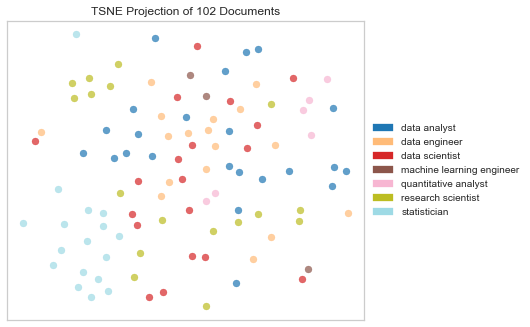

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from yellowbrick.text import TSNEVisualizer

tfidf = TfidfVectorizer(stop_words='english')

X = tfidf.fit_transform(jobdescription_post)
y = jobclass_post

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(decompose_by=75, decompose='svd', colormap='tab20')
tsne.fit(X, y)
tsne.show()

In [14]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
# Initializing Dictionary
d = {}
postprocessed_df["jobdescription_split"] = postprocessed_df["jobdescription"].astype(str).str.lower().str.split()

p_description = postprocessed_df["jobdescription_split"].apply(lambda x: [item for item in x if item not in stop])
p_description

0      [job, description, purpose, aml, financial, cr...
1      [bristol, myers, squibb,, inspired, single, vi...
2      [bristol, myers, squibb,, inspired, single, vi...
3      [software, engineering, &, technology, univers...
4      [student, technology,, agile, &, readiness, tr...
                             ...                        
97     [empi, rx, health, revolutionary, pharmacy, be...
98     [background, information, innovative, defense,...
99     [clearing,, markets, &, issuer, services, tech...
100    [you’ll, doing., ., ., visible, engineering, t...
101    [tasks, responsibilities, primary, responsibil...
Name: jobdescription_split, Length: 102, dtype: object

In [16]:
# counting number of times each word comes up in list of words (in dictionary)
for word_list in p_description:
    #word_list = descr.split()
    for word in word_list: 
        d[word] = d.get(word, 0) + 1

In [17]:
word_freq = []
for key, value in d.items():
    word_freq.append((value, key))

In [18]:
word_freq.sort(reverse=True) 
print(word_freq)

[(869, 'data'), (401, 'experience'), (305, 'work'), (190, 'business'), (175, 'clinical'), (168, 'statistical'), (168, 'development'), (158, 'team'), (147, 'years'), (133, 'analysis'), (132, 'research'), (131, 'ability'), (128, 'skills'), (125, 'knowledge'), (122, 'management'), (115, 'support'), (109, 'including'), (108, 'required'), (106, '-'), (101, 'strong'), (98, ','), (92, 'related'), (90, 'job'), (89, '&'), (88, 'develop'), (84, 'solutions'), (82, 'study'), (81, 'within'), (81, 'responsibilities'), (81, 'quality'), (81, 'new'), (80, 'requirements'), (78, 'provide'), (78, 'across'), (77, '.'), (76, 'review'), (76, 'analytical'), (75, 'technology'), (74, 'understanding'), (74, 'technical'), (73, 'position'), (73, 'complex'), (72, 'using'), (72, 'degree'), (71, 'analytics'), (70, 'tools'), (69, 'company'), (68, 'working'), (68, 'ensure'), (67, 'systems'), (67, 'opportunity'), (67, 'communication'), (63, 'sql'), (62, 'design'), (61, 'preferred'), (61, 'models'), (61, 'learning'), (59

# TF-IDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(jobdescription_raw)

In [20]:
print(vectorizer.get_feature_names())
print(X.shape)

['00', '000', '03', '04', '05375', '07', '07033', '07677', '07960', '08807duration', '08901', '0hhzyallbn', '10', '100', '100x', '103', '11', '110', '116', '12', '120k', '124', '125', '13', '130kresponsibilitiesperforms', '15', '150', '15th', '16', '160', '170', '1777', '1784', '18', '19', '190b', '19486qualifications', '1973', '1976', '19visa', '1nf', '1st', '20', '200', '20003679', '20003680', '20005047', '2006905', '2007814', '2007842', '2008627', '2008697', '201', '2016', '2018', '2019', '2020', '2020job', '2021', '2022', '20st1350', '21', '22', '220', '230', '24', '248', '25', '27', '2775', '2776', '27s', '2d', '30', '301d', '31', '3209', '35', '350', '360', '37', '39', '3d', '3rd', '40', '400', '4009job', '401', '401k', '40hrs', '415', '43', '45', '45092', '45220', '454', '4542', '48', '48076', '50', '5094', '52', '54', '55', '5g', '60', '600', '609', '6173', '65', '68949', '6nf', '70', '72', '740', '75', '800', '82914', '85', '866', '90', '9085200727', '946', '96003', '98572', '

In [21]:
print(X[0,])

  (0, 34)	0.03325087636854252
  (0, 1166)	0.03325087636854252
  (0, 1532)	0.032517634853692086
  (0, 4543)	0.03403472509502851
  (0, 3849)	0.029982433973492706
  (0, 2011)	0.04826774129337025
  (0, 2982)	0.029982433973492706
  (0, 2262)	0.039054519643791724
  (0, 3327)	0.027911024028902835
  (0, 113)	0.056142794513209325
  (0, 0)	0.0623589328479053
  (0, 112)	0.04366113046858099
  (0, 1106)	0.03677463962588564
  (0, 4730)	0.027911024028902835
  (0, 86)	0.056142794513209325
  (0, 31)	0.056142794513209325
  (0, 122)	0.056142794513209325
  (0, 52)	0.056142794513209325
  (0, 3295)	0.056142794513209325
  (0, 4201)	0.056142794513209325
  (0, 964)	0.039054519643791724
  (0, 5008)	0.022993125232450617
  (0, 1767)	0.024642581633853012
  (0, 1734)	0.021553061050400165
  (0, 4725)	0.04826774129337025
  :	:
  (0, 4977)	0.04678850661446066
  (0, 165)	0.0965354825867405
  (0, 2352)	0.11472143059619912
  (0, 366)	0.11228558902641865
  (0, 992)	0.11228558902641865
  (0, 4828)	0.08828434281071773
  (0,

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

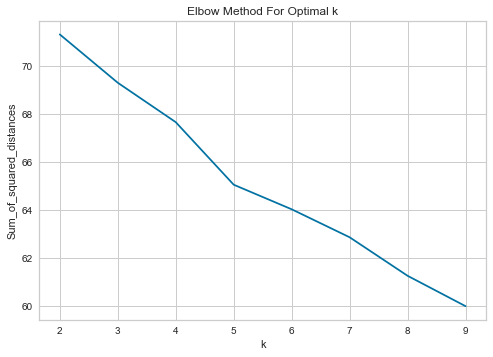

In [23]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
true_k = 1
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
indeed_cl=pd.DataFrame(list(zip(jobclass_raw,labels)),columns=['title','cluster'])
print(indeed_cl.sort_values(by=['cluster']))

                  title  cluster
0        data scientist        0
73   research scientist        0
72   research scientist        0
71   research scientist        0
70   research scientist        0
..                  ...      ...
29         statistician        0
28         statistician        0
27         statistician        0
37         statistician        0
101       data engineer        0

[102 rows x 2 columns]


In [25]:
indeed_cl.groupby(['cluster'])['cluster'].count()

cluster
0    102
Name: cluster, dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Cluster: 0
Titles:
            data scientist
      quantitative analyst
              statistician
              data analyst
        research scientist
 machine learning engineer
             data engineer


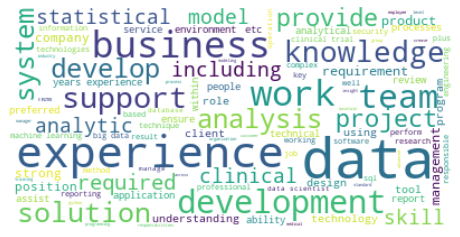

In [26]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize 

stop_words = set(stopwords.words('english'))  

result={'cluster':labels,'jobclass':jobclass_post,'jobdescription':jobdescription_post}
result=pd.DataFrame(result)
for k in range(0,true_k):
# for k in range(0,1):
    s=result[result.cluster==k]
    
    text=s['jobdescription'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    text=' '.join([str(elem) for elem in filtered_sentence])

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles:')
    titles=indeed_cl[indeed_cl.cluster==k]['title']
    titles=titles.drop_duplicates()
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Generating Job Summary from All Job Descriptions

In [27]:
import pandas as pd
import numpy as np
import datetime
import re
from tqdm import tqdm

# preprocessing
corpus = result
corpus.loc[:,"cluster"] = corpus["cluster"].astype(str)
corpus.loc[:,"jobclass"] = corpus["jobclass"].astype(str)
corpus.loc[:,"jobdescription"] = corpus["jobdescription"].astype(str)
corpus = corpus.applymap(lambda x: x.strip())

import string
def remove_weird_letters(x):
    new_string = ""
    accepted_char = list(string.ascii_lowercase) + list(string.ascii_uppercase) + list(string.punctuation) + list(" ")
    
    for letter in x:
        for char in accepted_char:
            if char in letter:
                new_string = new_string + char
                break
    return new_string

corpus["Summary"] = corpus["jobdescription"].apply(lambda x: remove_weird_letters(x))

corpus.head(5)

,cluster,jobclass,jobdescription,Summary
0,0,data scientist,Job Description The purpose of the AML Financi...,Job Description The purpose of the AML Financi...
1,0,data scientist,"At Bristol Myers Squibb, we are inspired by a ...","At Bristol Myers Squibb, we are inspired by a ..."
2,0,data scientist,"At Bristol Myers Squibb, we are inspired by a ...","At Bristol Myers Squibb, we are inspired by a ..."
3,0,data scientist,Software Engineering & Technology University P...,Software Engineering & Technology University P...
4,0,data scientist,"Student Technology, Agile & Readiness Training...","Student Technology, Agile & Readiness Training..."


## Next, we tokenize using nltk and apply two sklearn transformers to create a spare weighted word matrix.

In [28]:
import nltk
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer #acts like a model pretty much

stop_words = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

def tokenize(text):
    # normalize case and remove punctuation
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    
    # tokenize text
    tokens = word_tokenize(text)
    
    # lemmatize andremove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return tokens
# initialize count vectorizer object
vect = CountVectorizer(tokenizer=tokenize)
X = vect.fit_transform(corpus["Summary"]) # [] needs to be wrapped around the string to make it a "document" if you select single element
vect.vocabulary_

from sklearn.feature_extraction.text import TfidfTransformer

# initialize tf-idf transformer object
transformer = TfidfTransformer(smooth_idf=False)
tfidf_X = transformer.fit_transform(X)

print('done')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\budchris\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


done


## Visualize PCA

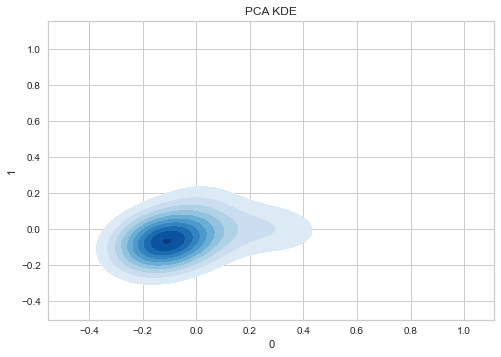

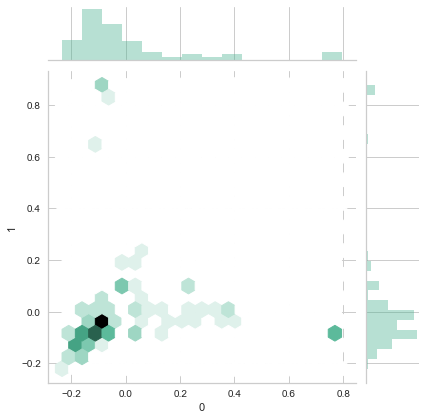

In [29]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
clust_df = pd.DataFrame(data=tfidf_X.toarray()) 
clust_df.columns = vect.vocabulary_

pca = PCA(n_components=20)
principalComponents = pca.fit_transform(clust_df) #replace with cosine or clust_df

PCA_components = pd.DataFrame(principalComponents)
PCA_components["cluster"] = corpus["cluster"]
PCA_components["jobclass"] = corpus["jobclass"]
PCA_components["Summary"] = corpus["Summary"]
PCA_components["Size"] = 1

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(PCA_components[0], PCA_components[1], shade=True, cmap = 'Blues',shade_lowest=False).set(title="PCA KDE")
ax = sns.jointplot(PCA_components[0], PCA_components[1], kind="hex", color="#4CB391")

In [31]:
import time
import gensim
import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import Word2Vec, WordEmbeddingSimilarityIndex
from gensim.similarities import SoftCosineSimilarity, SparseTermSimilarityMatrix
fasttext = api.load('fasttext-wiki-news-subwords-300')

In [32]:
# Create a soft cosine matrix



termsim_index = WordEmbeddingSimilarityIndex(fasttext.wv)

dictionary = Dictionary([simple_preprocess(doc) for doc in corpus["Summary"]]) 
bow_corpus = [dictionary.doc2bow(simple_preprocess(document)) for document in corpus["Summary"]]

similarity_matrix = SparseTermSimilarityMatrix(termsim_index, dictionary)
docsim_index = SoftCosineSimilarity(bow_corpus, similarity_matrix)#, num_best=10)

sims = docsim_index[bow_corpus]
cosine = pd.DataFrame(data=sims)
cosine = cosine.applymap(lambda x: round(x,4))

print(cosine.iloc[:5,:5])

C:\Users\budchris\anaconda3\envs\PythonAdv\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


        0       1       2       3       4
0  1.0000  0.8048  0.8099  0.8131  0.8097
1  0.8048  1.0000  0.9935  0.8982  0.9044
2  0.8099  0.9935  1.0000  0.9041  0.9143
3  0.8131  0.8982  0.9041  1.0000  0.9647
4  0.8097  0.9044  0.9143  0.9647  1.0000


## Apply the PCA to the cosine matrix instead

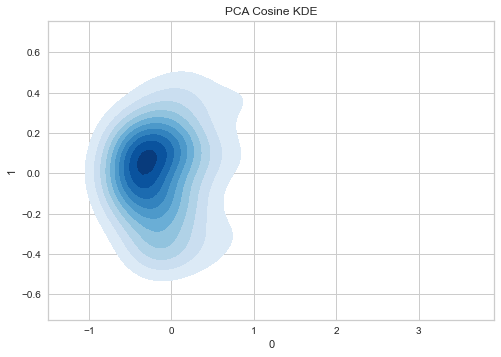

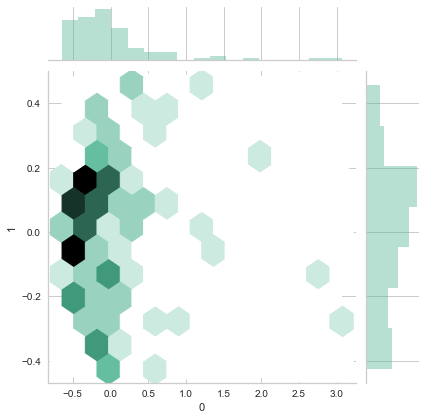

In [45]:
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(cosine) #replace with cosine or clust_df

PCA_components = pd.DataFrame(principalComponents)
PCA_components["Cluster"] = corpus["cluster"]
PCA_components["Jobclass"] = corpus["jobclass"]
PCA_components["Summary"] = corpus["Summary"]
PCA_components["Size"] = 1

import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.kdeplot(PCA_components[0], PCA_components[1], shade=True, cmap = 'Blues',shade_lowest=False).set(title="PCA Cosine KDE")
ax = sns.jointplot(PCA_components[0], PCA_components[1], kind="hex", color="#4CB391")

## The PCA search and summarize function:

In [46]:
from gensim.summarization import summarize
from tqdm import tqdm

def area_search_function(x_min,x_max,y_min,y_max,df):
    summary = ""
    df_t = df[(df[0] > x_min) &
            (df[0] < x_max) &
            (df[1] > y_min) &
            (df[1] < y_max)]
    all_desc = df_t["Summary"]
    for desc in tqdm(all_desc):
        try:
            summary = summary + desc
        except:
            print(desc)
    return summary

# for k in range(0,true_k):
#     PCA_components_k=PCA_components[PCA_components["Cluster"]==k]

#     summary_pinpoint = area_search_function(-1,1,-0.5,-0.1,PCA_components_k)
#     summary_pinpoint = summarize(summary_pinpoint,word_count=200)
#     print('Cluster: {}'.format(k))
#     print(summary_pinpoint)
#     print('')

summary_pinpoint = area_search_function(-1,3.5,-0.5,0.5,PCA_components)
summary_pinpoint = summarize(summary_pinpoint,word_count=200)
print(summary_pinpoint)

100%|█████████████████████████████████████████████████████████████████████████████| 102/102 [00:00<00:00, 33951.19it/s]


## Structured Extraction using spaCy

In [35]:
import spacy
import en_core_web_sm
from spacy import displacy

# load en_core_web_sm of English for vocabluary, syntax & entities
nlp = en_core_web_sm.load()

sentence= "This position will be the first of its kind at Fair Harbor and as such, the person in this role must be able and excited to take full responsibility for building out and maintaining internal tracking and reporting procedures"

processed_sentence = nlp(sentence)

displacy.render(processed_sentence, style="dep", jupyter= True)

In [36]:
displacy.render(processed_sentence, style = "ent",jupyter = True)

## Find entity pairs and relationships

In [37]:
from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

def get_entities(sent):
  # credit to https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy/
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)

## Network Graph Visualization

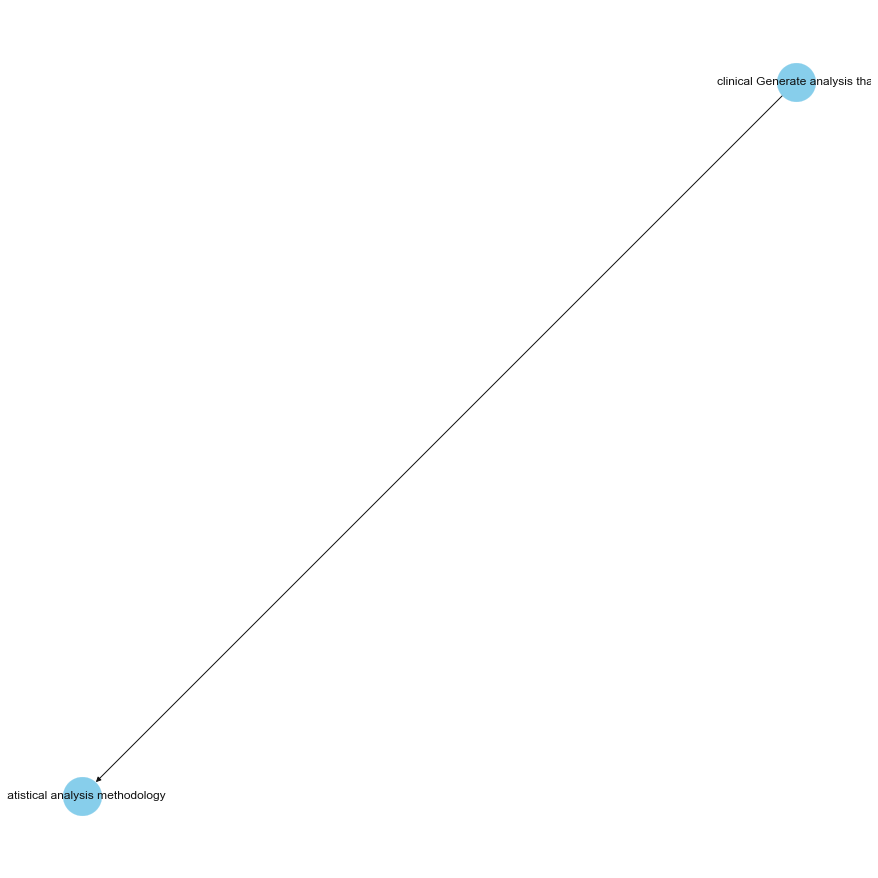

In [38]:
entity_pairs = []

#create list with all sentences
tokens = corpus["Summary"].apply(lambda x: sent_tokenize(x))
all_sent = []
for token in tokens:
    all_sent.extend(token)

for i in all_sent:
  entity_pairs.append(get_entities(i))

relations = [get_relation(i) for i in all_sent]

top_relations=pd.Series(relations).value_counts()

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="Provide"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()